# Comparisons, Masks, and Boolean Logic

This section covers the use of Boolean masks to examine and manipulate values within NumPy arrays. Masking comes up when
you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, 
you might wish to count all values grater than a certain value, or perhaps remove all ouliers that are above some threshold. In NumPy, Boolean masking is often
most efficient way to accomplish these types of tasks.

## Example: Counting Rainy Days

Imagine you have a series of data that represents the amount of precipitaiton each day for ayear in a given city. For example, here we'll load the daily rainfall
statistics for the city of seatthe in 2014, using Pandas.

In [37]:
import numpy as np
import pandas as pd 

rainfall  = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0
inches.shape

(365,)

The array contains 365 values, givin daily rainfall in inches from January 1 to December 31, 2014
As a first quick visualization, let's look at the histogram of rainy days, which was generated using Matplotlib.

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn; seaborn.set() # set plot styles

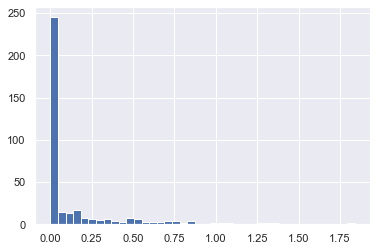

In [39]:
plt.hist(inches, 40);

This histogram gives us a general ida of what the data looks like: despite its reputation, the vast majority of days in SEattle saw near zero measured rainfall in 2014.
But this doesn't do a good job of converying some information we'd like to see: for example , how many rainy days were there in the year? What is the average precipitation on those rainy days? How many days were there with more than half an inch of rain?

### Diggin into the data

One approach to this would be to answer these question by hand: loop through the data, incrementing a counter each time we see values in some desired range. For reasons discussed throughout this chapter, such an approach is very inefficient, both from the standpoint of time writing code and time computing there result. We saw that NumPy's ufuncs can be used in place of loops to do fast element-wise arithmetic operations on arryas; in the same way, we can use other ufuncs to do element-wise comparison over arrays, and we can then manipulate the results to answer the questions we have. We'll leave the data aside for right now, and discuss some general tools in NumPy to use *masking* toquickly answer these types of questions.

## Comparison Operators as ufuncs

We introudces ufuncs, and focused in particular on arithmetic operators. We saw that using `+`, `-`, `*`, `/`, and other on arryas leads to element-wise operations. NumPy also implements comparison opeartors such as `<` (less than) and `>` (greater than) as element-wise ufuncs. The result of these comparison operators is always an array with a Boolean data type. All six of the standard comparison operations are available:

In [42]:
x = np.arange(1,6)

In [44]:
x < 3

array([ True,  True, False, False, False])

In [46]:
x > 3

array([False, False, False,  True,  True])

In [47]:
x <= 3

array([ True,  True,  True, False, False])

In [48]:
x >= 3

array([False, False,  True,  True,  True])

In [49]:
x != 3

array([ True,  True, False,  True,  True])

In [50]:
x == 3

array([False, False,  True, False, False])

It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [51]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

```
Operator 	Equivalent ufunc 		Operator 	Equivalent ufunc
== 	np.equal 		!= 	np.not_equal
< 	np.less 		<= 	np.less_equal
> 	np.greater 		>= 	np.greater_equal

```

These will work on arrays of any size and shape:

In [52]:
rng = np.random.RandomState(0)

In [54]:
x = rng.randint(10, size=(3, 4))
x

array([[8, 8, 1, 6],
       [7, 7, 8, 1],
       [5, 9, 8, 9]])

In [55]:
x < 6

array([[False, False,  True, False],
       [False, False, False,  True],
       [ True, False, False, False]])

In each case, the result is a Boolean array, and NumPy provides a number of straightforward patterns for working with these Boolean results.

## Working with Boolean Arrays

Given a Boolean array, there are a host of useful opeartions you can do. We'll work with `x`, the two-dimensional array we created earlier.

In [56]:
print(x)

[[8 8 1 6]
 [7 7 8 1]
 [5 9 8 9]]


## Counting entries

To count the number of `True` entries in a Boolean array, `np.count_nonzero` is useful:

In [57]:
# how many values less than 6?
np.count_nonzero(x < 6)

3

We see that there are eigth array entries that are less than 6. Another way to get at this information is to use `np.sum`; in this case, `False` is itnerpreted as `0` and `True` is interpreted as `1`:

In [58]:
np.sum(x < 6)

3

The benefit of `sum()` is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well:

In [59]:
# how many values less than 6 in each row?

np.sum(x < 6, axis=1)

array([1, 1, 1])

In [60]:
x

array([[8, 8, 1, 6],
       [7, 7, 8, 1],
       [5, 9, 8, 9]])

This counts the number of values less than 6 in each row of the matrix.

If we're interested in quickly checking whether any or all the values are true, we can use `np.any` or `np.all`:

In [61]:
# are there any values greater than 8?

np.any(x > 8)

True

In [62]:
# are there any values less than 0?
np.any(x < 0)

False

In [63]:
# are all values less than 10?
np.all(x < 10)

True

In [64]:
# are all values equal to 6?
np.all(x == 6)

False

`np.all` and `np.any` can be used along particular axes as well.

In [66]:
np.all(x < 9, axis=1)

array([ True,  True, False])

Finally, a quick warning, Python has built-in `sum()`, `any()`, and `all()` functions. These have different syntax and will fail or porudce unintended results when used on multidimensional arrays.

## Bool operators